In [1]:
import pandas as pd
import numpy as np
import seaborn
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from matplotlib.pyplot import hist
from scipy.stats import norm
from scipy.stats.stats import linregress

In [2]:
"""Disclaimer : I have not managed to install autopep8 on either my personal computer or the CRDN computer. I have tried to put my code in pep8 format whenever possible."""

'Disclaimer : I have not managed to install autopep8 on either my personal computer or the CRDN computer. I have tried to put my code in pep8 format whenever possible.'

In [3]:
df = pd.read_csv('data_dm3.csv', header =None)
df.shape

(442, 211)

# Question 1

In [4]:
print('The number of exploratory variables is : '
      +str(df.shape[1]-1))
print('The number of observations is : '
      +str(df.shape[0]))


The number of exploratory variables is : 210
The number of observations is : 442


# Question 2

In [5]:
average = 0
for i in range(df.shape[1]-1):
    column = df.iloc[:,i]
    if np.abs(column.mean()) > np.abs(average):
        average = column.mean()

print('The largest average has an absolute value of : '
      +str(np.abs(average)))
print('We can consider that the exploratory variables are centered.')

The largest average has an absolute value of : 1.7231063232870077e-16
We can consider that the exploratory variables are centered.


In [6]:
variance_max = 0
variance_min = np.inf

for i in range(df.shape[1]-1):
    column = df.iloc[:,i]
    if column.var() > variance_max:
        variance_max = column.var()
    if column.var() < variance_min:
        variance_min = column.var()

print('Each variance is in the interval : [ '
      +str(variance_min)
      +' : '
      +str(variance_max)
      +' ]')
print('We can consider that the exploratory variables are normalized.')

Each variance is in the interval : [ 1.0022675736961433 : 1.0022675736961468 ]
We can consider that the exploratory variables are normalized.


In [7]:
last_column = df.iloc[:,-1]

print('The mean of the output variable is : '
      +str(last_column.mean()))
print('The variance of the output variable is : '
      +str(last_column.var()))
print('The output variable is neither centred nor normalized.')

The mean of the output variable is : 152.13348416289594
The variance of the output variable is : 5943.331347923785
The output variable is neither centred nor normalized.


In [8]:
random_variables = list(np.random.randint(0,df.shape[1]-1,size =4))
random_variables.append(210)

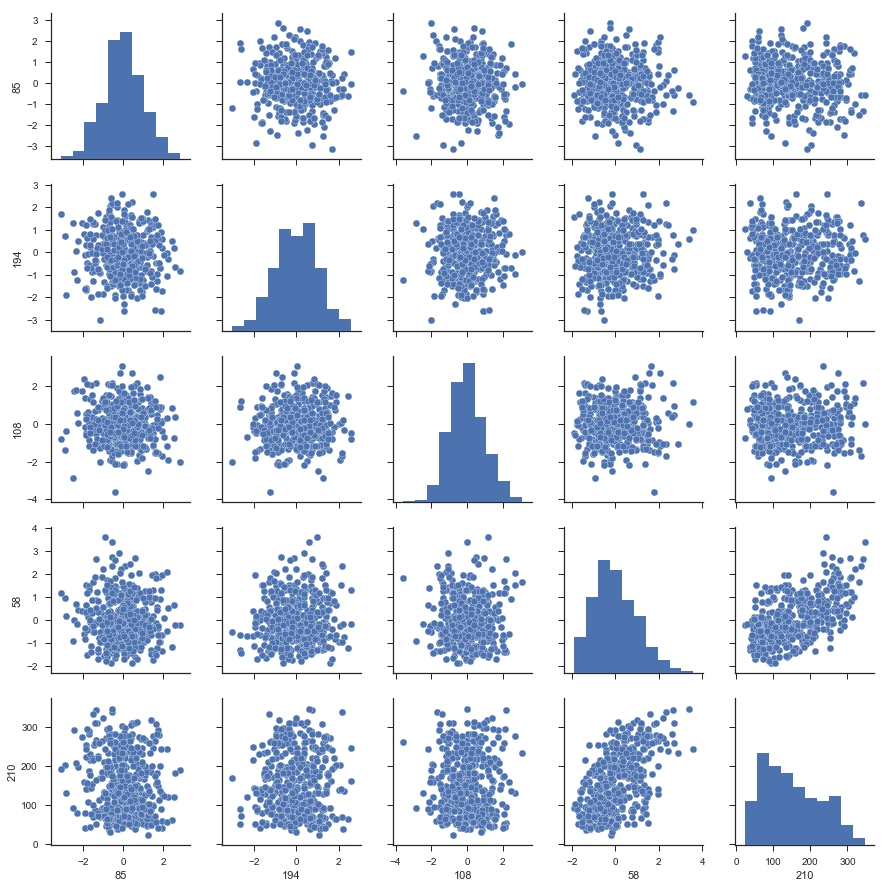

In [9]:
seaborn.set(style="ticks",color_codes=True)
dataset = pd.DataFrame([df.iloc[:,i] for i in random_variables]).transpose()
g = seaborn.pairplot(dataset)

 Judging by the distributions of the graphs, we can conjecture that the exploratory variables are independent of each other.

# Question 3

We will split our DataFrame in: 80% for the train set and 20% for the test set.

In [10]:
train, test = train_test_split(df, test_size=0.2)


In [11]:
#We must remove the last column which corresponds to the ouput values
train_x = train.drop(columns = 210)
train_y = train.iloc[:,210].transpose()
test_x = test.drop(columns = 210)
test_y = test.iloc[:,210].transpose()

print('The training set has size : '
      + str(train_x.shape))
print('The test set has size : '
      + str(test_x.shape))


The training set has size : (353, 210)
The test set has size : (89, 210)


# Question 4

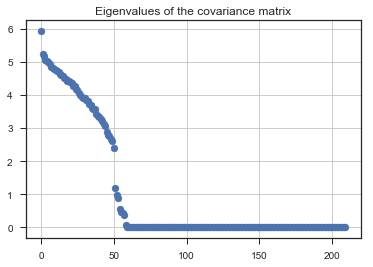

In [12]:
#covariance is applied to VARIABLES, the covariance matrix is of size 210 x 210. So we put rowvar = False in np.cov
covariance_matrix = np.cov(train_x,rowvar=False)
covariance_eigenvalues , covariance_eigenvectors = linalg.eigh(covariance_matrix)

absciss = [i for i in range(len(covariance_eigenvalues))]
plt.figure()
plt.title("Eigenvalues of the covariance matrix")
plt.grid()
plt.scatter(absciss,covariance_eigenvalues[::-1])

#BEWARE!! If this plot looks absurd, it may be because you have run the last cell of code already (Q15) which has %matplotlib notebook 
#on! You MUST stop the notebook and execute in the right order.

It makes sense to only keep the first PCA values as the last eigenvalues(approximately from number 60 to 353) are almost equal to zero . This means tht these dimensions will have almost no impact when determining the model.

# Question 5

In [13]:
#We create the Linear Regression model for the PCA-adjusted variables
PCA_train_X = np.dot(
    train_x,
    covariance_eigenvectors[:60].transpose())

reg_PCA = LinearRegression().fit(
    PCA_train_X,
    train_y)


Text(0.5,1,'PCA Linear Regression coefficients')

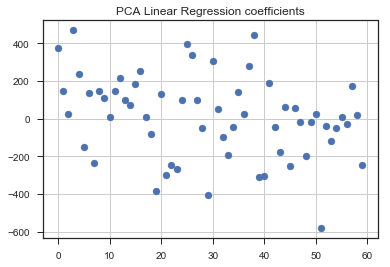

In [14]:
#We plot the regression coefficients for PCA
absciss = [i for i in range(60)]

plt.scatter(absciss,reg_PCA.coef_)
plt.grid()
plt.title("PCA Linear Regression coefficients")

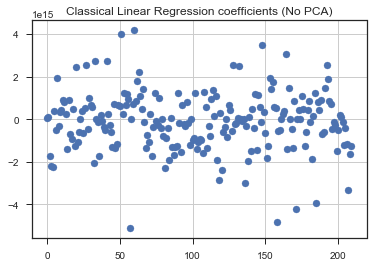

In [15]:

#We plot the coefficients for Non PCA OLS
reg_NO_PCA = LinearRegression().fit(train_x,train_y)
absciss = [i for i in range(len(reg_NO_PCA.coef_))]

plt.scatter(absciss,reg_NO_PCA.coef_)
plt.title("Classical Linear Regression coefficients (No PCA)")
plt.grid()

# Question 6

In [16]:
print("The intercept under PCA Linear Regression is : "
      + str(reg_PCA.intercept_))
print("The intercept under Regular Linear Regression is : "
      + str(reg_NO_PCA.intercept_))
print("The mean value for the output is : "
      + str(np.mean(train_y)))

The intercept under PCA Linear Regression is : 152.9609588801684
The intercept under Regular Linear Regression is : 153.03828788951841
The mean value for the output is : 155.02266288951841


We observe that the two intercepts are almost identical. This means that the input variables that we removed through PCA do not make for a better estimation of the intercept.

Exceptionally for this question, we will center and normalize the variables after PCA (the low dimensional ones).

In [17]:
PCA_train_X = np.dot(train_x,covariance_eigenvectors[:,0:60])
PCA_train_X_scaled = scale(PCA_train_X)
print('Normalizing and Centering the variables gives us an intercept of : '
      +str(LinearRegression().fit(PCA_train_X_scaled,train_y).intercept_))
print('The intercept is equal to the average of Y on the train set.')

Normalizing and Centering the variables gives us an intercept of : 155.02266288951841
The intercept is equal to the average of Y on the train set.


# Question 7

In [18]:
#We calculate the predictions on the test set for both PCA and Non PCA OLS
PCA_prediction = reg_PCA.predict(
    np.dot(
        test_x,
        covariance_eigenvectors[:,0:60]))

NO_PCA_prediction = reg_NO_PCA.predict(test_x)

PCA_residual = test_y-PCA_prediction
NO_PCA_residual = test_y-NO_PCA_prediction

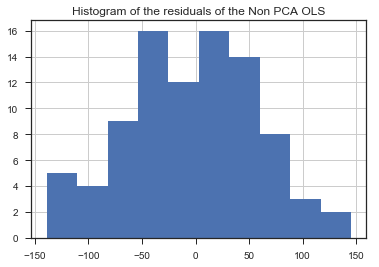

In [19]:
hist(NO_PCA_residual)
plt.title("Histogram of the residuals of the Non PCA OLS")
plt.grid()

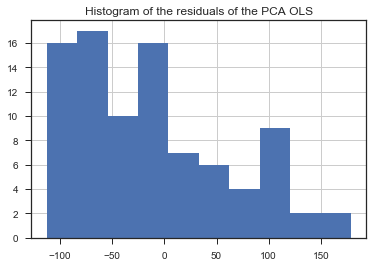

In [20]:
hist(PCA_residual)
plt.title("Histogram of the residuals of the PCA OLS")
plt.grid()

In [21]:
#Determination Coefficient in each case
def determination_coefficient(Y_pred,Y_true):
    y_avg = np.average(Y_true)
    numerator = np.sum([(Y_pred[k]-y_avg)**2 for k in range(len(Y_true))])
    denominator = np.sum([(Y_true[k]-y_avg)**2 for k in range(len(Y_true))])
    return numerator/denominator


print("The determination coefficient for the test sample in PCA OLS is : "
      +str(determination_coefficient(list(PCA_prediction),list(test_y))))
print("The determination coefficient for the test sample in NON-PCA OLS is : "
      +str(determination_coefficient(list(NO_PCA_prediction),list(test_y))))

The determination coefficient for the test sample in PCA OLS is : 0.029170901024358105
The determination coefficient for the test sample in NON-PCA OLS is : 0.6466314810875075


In [22]:
#Prediction risk in each case
def prediction_risk(Y_pred,Y_true): # beware: the prediction_risk function takes two LISTS as arguments! You must put the prediction and true vector in list form
    return np.average([(Y_pred[k]-Y_true[k])**2 for k in range(len(Y_pred))])/len(Y_pred)


print("The prediction risk for the test sample in PCA OLS is : "
      +str(prediction_risk(list(PCA_prediction),list(test_y))))
print("The prediction risk for the test sample in NON PCA OLS is : "
      +str(prediction_risk(list(NO_PCA_prediction),list(test_y))))


The prediction risk for the test sample in PCA OLS is : 59.8446508569236
The prediction risk for the test sample in NON PCA OLS is : 41.842484975002435


Conclusion : No PCA yields a slightly better determination coefficient and a lower prediction risk than applying PCA.

# Question 8

In [23]:
def forward_variable_selection():
    n = train_x.shape[1]
    #Here n is the number of variables, not the number of instances
    model = [LinearRegression().fit(np.array(train_x[k]).reshape(-1,1),train_y) for k in range(n)]
    #list containing each model for each selected variable k
    parameters = [model[k].coef_ for k in range(n)]
    #list containing the parameters for each selected variable k
    
    sigma = [np.sqrt(np.linalg.norm(np.array(train_y)-model[k].predict(np.array(train_x[k]).reshape(-1,1)))**2/len(train_x)) for k in range(n)]
    #For every model we calculate the test statistic using the formula
    s = [1/(np.linalg.norm(np.array(train_x[k]).reshape(-1,1))**2) for k in range(n)]
    test_statistics = [np.abs(parameters[k])/(s[k]*sigma[k]) for k in range(n)]    
    
    p_values = [2*(1-norm.cdf(test_statistics[k])) for k in range(n)]
    S = [np.argmin(p_values)]
    #We initially select the k yielding the smallest p_value
    residual_vectors_indices = [i for i in range(n)]
    #The "residual" vectors are those that have not been selected yet in the algorithm!! They have nothing to do with the residual of a prediction!!
    residual_vectors_indices.remove(S[0])
    residual_vectors = np.array([train_x[k] for k in residual_vectors_indices]).transpose()
    #This concludes the initialization.
    
    for l in range(n-1):
        #We repeat the process until every variable has been selected
        model = [LinearRegression().fit(np.array(residual_vectors[:,k]).reshape(-1,1),train_y) for k in range(len(residual_vectors_indices))]
        parameters = [model[k].coef_ for k in range(len(residual_vectors_indices))]
    
        sigma = [np.sqrt(
            np.linalg.norm(
                np.array(train_y).reshape(-1,1)-model[k].predict(np.array(residual_vectors[k]).reshape(-1,1)))**2/(train_x.shape[0] - train_x.shape[1] - 1)) for k in range(len(residual_vectors_indices))]
        s = [1/(np.linalg.norm(np.array(residual_vectors[k]).reshape(-1,1))**2) for k in range(len(residual_vectors_indices))]
        test_statistics = [np.abs(parameters[k])/(s[k]*sigma[k]) for k in range(len(residual_vectors_indices))]    
        
        p_values = [2*(1-norm.cdf(test_statistics[k])) for k in range(len(residual_vectors_indices))]
        min_p_values_index = residual_vectors_indices[np.argmin(p_values)]
        S.append(min_p_values_index)
        residual_vectors_indices.remove(min_p_values_index)
        residual_vectors = np.array([train_x[k] for k in residual_vectors_indices]).transpose()
    return S

In [24]:
optimal_variables = forward_variable_selection()
optimal_variables

[0,
 123,
 174,
 167,
 58,
 23,
 34,
 133,
 79,
 99,
 117,
 154,
 49,
 112,
 26,
 27,
 148,
 28,
 22,
 84,
 208,
 17,
 31,
 80,
 147,
 168,
 155,
 13,
 130,
 131,
 85,
 33,
 43,
 177,
 153,
 47,
 115,
 138,
 53,
 128,
 176,
 76,
 113,
 98,
 203,
 191,
 135,
 182,
 207,
 209,
 190,
 4,
 45,
 103,
 162,
 187,
 61,
 185,
 73,
 93,
 129,
 94,
 158,
 159,
 181,
 95,
 196,
 104,
 165,
 166,
 18,
 37,
 38,
 152,
 20,
 40,
 41,
 111,
 178,
 83,
 2,
 87,
 97,
 120,
 172,
 173,
 175,
 204,
 179,
 72,
 157,
 127,
 132,
 63,
 102,
 70,
 82,
 66,
 141,
 142,
 198,
 68,
 29,
 57,
 146,
 126,
 10,
 48,
 52,
 197,
 11,
 121,
 163,
 30,
 124,
 105,
 59,
 19,
 64,
 90,
 16,
 161,
 143,
 56,
 170,
 194,
 101,
 149,
 7,
 14,
 202,
 9,
 206,
 42,
 164,
 69,
 192,
 199,
 44,
 46,
 183,
 184,
 116,
 125,
 189,
 24,
 35,
 39,
 201,
 205,
 119,
 25,
 134,
 88,
 137,
 140,
 21,
 144,
 91,
 92,
 151,
 96,
 106,
 169,
 171,
 188,
 62,
 100,
 114,
 108,
 200,
 6,
 54,
 110,
 122,
 55,
 15,
 32,
 5,
 71,
 75,
 86,


# Question 9

In [25]:
train_x.shape


(353, 210)

In [26]:
def forward_variable_selection_with_stop():
    n = train_x.shape[1]
    #Here n is the number of variables, not the number of instances
    model = [LinearRegression().fit(np.array(train_x[k]).reshape(-1,1),train_y) for k in range(n)]
    #list containing each model for each selected variable k
    parameters = [model[k].coef_ for k in range(n)]
    #list containing the parameters for each selected variable k
    
    sigma = [np.sqrt(np.linalg.norm(np.array(train_y)-model[k].predict(np.array(train_x[k]).reshape(-1,1)))**2/len(train_x)) for k in range(n)]
    #For every model we calculate the test statistic using the formula
    s = [1/(np.linalg.norm(np.array(train_x[k]).reshape(-1,1))**2) for k in range(n)]
    test_statistics = [np.abs(parameters[k])/(s[k]*sigma[k]) for k in range(n)]    
    
    p_values = [2*(1-norm.cdf(test_statistics[k])) for k in range(n)]
    S = [np.argmin(p_values)]
    #We initially select the k yielding the smallest p_value
    residual_vectors_indices = [i for i in range(n)]
    #The "residual" vectors are those that have not been selected yet in the algorithm!! They have nothing to do with the residual of a prediction!!
    residual_vectors_indices.remove(S[0])
    residual_vectors = np.array([train_x[k] for k in residual_vectors_indices]).transpose()
    #This concludes the initialization.
    l=0
    
    while(l<n-1 and min(p_values)<0.1): 
        #We now add a stopping criterion on the p_values
        l+=1
        model = [LinearRegression().fit(np.array(residual_vectors[:,k]).reshape(-1,1),train_y) for k in range(len(residual_vectors_indices))]
        parameters = [model[k].coef_ for k in range(len(residual_vectors_indices))]
    
        sigma = [np.sqrt(
            np.linalg.norm(
                np.array(train_y).reshape(-1,1)-model[k].predict(
                    np.array(residual_vectors[k]).reshape(-1,1)))**2/(train_x.shape[0] - train_x.shape[1] - 1)) for k in range(len(residual_vectors_indices))]
        
        s = [1/(np.linalg.norm(np.array(residual_vectors[k]).reshape(-1,1))**2) for k in range(len(residual_vectors_indices))]

        test_statistics = [np.abs(parameters[k])/(s[k]*sigma[k]) for k in range(len(residual_vectors_indices))]    
        
        p_values = [2*(1-norm.cdf(test_statistics[k])) for k in range(len(residual_vectors_indices))]
        min_p_values_index = residual_vectors_indices[np.argmin(p_values)]
        S.append(min_p_values_index)
        residual_vectors_indices.remove(min_p_values_index)
        residual_vectors = np.array([train_x[k] for k in residual_vectors_indices]).transpose()
    return S

In [27]:
optimal_variables_with_stop = forward_variable_selection_with_stop()
print("The selected variables are : "
      +str(optimal_variables_with_stop))

The selected variables are : [0, 123, 174, 167, 58, 23, 34, 133, 79]


We now analyze the test statistics for the first three iterations

In [28]:
#We create a new algorithm that will give us the test statistics for the 3 first variables

def test_selection():
    n = train_x.shape[1]
    #Here n is the number of variables, not the number of instances
    model = [LinearRegression().fit(np.array(train_x[k]).reshape(-1,1),train_y) for k in range(n)]
    #list containing each model for each selected variable k
    parameters = [model[k].coef_ for k in range(n)]
    #list containing the parameters for each selected variable k
    
    sigma = [np.sqrt(np.linalg.norm(np.array(train_y)-model[k].predict(np.array(train_x[k]).reshape(-1,1)))**2/len(train_x)) for k in range(n)]
    #For every model we calculate the test statistic using the formula
    s = [1/(np.linalg.norm(np.array(train_x[k]).reshape(-1,1))**2) for k in range(n)]
    test_statistics = [np.abs(parameters[k])/(s[k]*sigma[k]) for k in range(n)]    
    
    p_values = [2*(1-norm.cdf(test_statistics[k])) for k in range(n)]
    S = [np.argmin(p_values)]
    #We initially select the k yielding the smallest p_value
    residual_vectors_indices = [i for i in range(n)]
    #The "residual" vectors are those that have not been selected yet in the algorithm!! They have nothing to do with the residual of a prediction!!
    residual_vectors_indices.remove(S[0])
    residual_vectors = np.array([train_x[k] for k in residual_vectors_indices]).transpose()
    #This concludes the initialization.
    l=0
    tests = [test_statistics]
    #Tests will contain the three test statistic vectors
    while(l<3):
        #We will only select the three first variables
        l+=1
        model = [LinearRegression().fit(
            np.array(residual_vectors[:,k]).reshape(-1,1),train_y) for k in range(len(residual_vectors_indices))]
        parameters = [model[k].coef_ for k in range(len(residual_vectors_indices))]
    
        sigma = [np.sqrt(
            np.linalg.norm(
                np.array(train_y).reshape(-1,1)-model[k].predict(np.array(residual_vectors[k]).reshape(-1,1)))**2/(train_x.shape[0] - train_x.shape[1] - 1)) for k in range(len(residual_vectors_indices))]
        
        s = [1/(np.linalg.norm(np.array(residual_vectors[k]).reshape(-1,1))**2) for k in range(len(residual_vectors_indices))]

        test_statistics = [np.abs(parameters[k])/(s[k]*sigma[k]) for k in range(len(residual_vectors_indices))]    
        
        p_values = [2*(1-norm.cdf(test_statistics[k])) for k in range(len(residual_vectors_indices))]
        min_p_values_index = residual_vectors_indices[np.argmin(p_values)]
        S.append(min_p_values_index)
        residual_vectors_indices.remove(min_p_values_index)
        residual_vectors = np.array([train_x[k] for k in residual_vectors_indices]).transpose()
        tests.append(test_statistics)
    return tests

In [29]:
tests = test_selection()

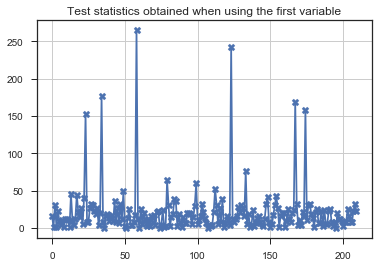

In [30]:
X1,X2,X3=[i for i in range(len(tests[0]))],[i for i in range(len(tests[1]))],[i for i in range(len(tests[2]))]
Y1,Y2,Y3=tests[0],tests[1],tests[2]
plt.scatter(X1,Y1,marker='X')
plt.plot(X1,Y1,'-x')
plt.title("Test statistics obtained when using the first variable")
plt.grid()


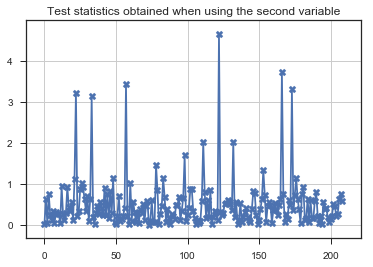

In [31]:
plt.plot(X2,Y2, '-x')
plt.scatter(X2,Y2,marker='X')
plt.title("Test statistics obtained when using the second variable")
plt.grid()
plt.show()


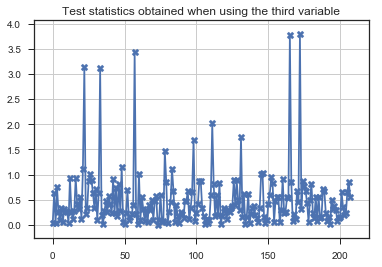

In [32]:
plt.plot(X3,Y3, '-x')
plt.scatter(X3,Y3,marker='X')
plt.title("Test statistics obtained when using the third variable")
plt.grid()

We observe that some test statistics are much more discriminant than others.

We now display the graphs of the first 50 p-values

In [33]:
#New algorithm to calculate the p-values: we remove the stopping criterion and we select the minimal p-value at each iteration

def p_value_selection():
    n = train_x.shape[1]
    #Here n is the number of variables, not the number of instances
    model = [LinearRegression().fit(np.array(train_x[k]).reshape(-1,1),train_y) for k in range(n)]
    #list containing each model for each selected variable k
    parameters = [model[k].coef_ for k in range(n)]
    #list containing the parameters for each selected variable k
    
    sigma = [np.sqrt(np.linalg.norm(np.array(train_y)-model[k].predict(np.array(train_x[k]).reshape(-1,1)))**2/len(train_x)) for k in range(n)]
    #For every model we calculate the test statistic using the formula
    s = [1/(np.linalg.norm(np.array(train_x[k]).reshape(-1,1))**2) for k in range(n)]
    test_statistics = [np.abs(parameters[k])/(s[k]*sigma[k]) for k in range(n)]    
    
    p_values = [2*(1-norm.cdf(test_statistics[k])) for k in range(n)]
    S = [np.argmin(p_values)]
    #We initially select the k yielding the smallest p_value
    residual_vectors_indices = [i for i in range(n)]
    #The "residual" vectors are those that have not been selected yet in the algorithm!! They have nothing to do with the residual of a prediction!!
    residual_vectors_indices.remove(S[0])
    residual_vectors = np.array([train_x[k] for k in residual_vectors_indices]).transpose()
    
    selected_p_values = [min(p_values)]
    l=0
    
    while(l<n-1):
        l+=1
        model = [LinearRegression().fit(np.array(residual_vectors[:,k]).reshape(-1,1),train_y) for k in range(len(residual_vectors_indices))]
        parameters = [model[k].coef_ for k in range(len(residual_vectors_indices))]
    
        sigma = [np.sqrt(
            np.linalg.norm(
                np.array(train_y).reshape(-1,1)-model[k].predict(np.array(residual_vectors[k]).reshape(-1,1)))**2/(train_x.shape[0] - train_x.shape[1] - 1)) for k in range(len(residual_vectors_indices))]
        
        s = [1/(np.linalg.norm(np.array(residual_vectors[k]).reshape(-1,1))**2) for k in range(len(residual_vectors_indices))]

        test_statistics = [np.abs(parameters[k])/(s[k]*sigma[k]) for k in range(len(residual_vectors_indices))]    
        
        p_values = [2*(1-norm.cdf(test_statistics[k])) for k in range(len(residual_vectors_indices))]
        
        selected_p_values.append(min(p_values))
            
        min_p_values_index = residual_vectors_indices[np.argmin(p_values)]
        S.append(min_p_values_index)
        residual_vectors_indices.remove(min_p_values_index)
        residual_vectors = np.array([train_x[k] for k in residual_vectors_indices]).transpose()
    return selected_p_values

In [34]:
p_values = p_value_selection()[:50]


Text(0.5,1,'First 50 selected p-values (blue) with horizontal line (red) at y=0.1')

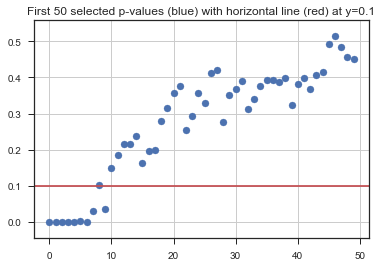

In [35]:
plt.scatter([i for i in range(50)],p_values)
plt.grid()
plt.axhline(y=0.1, color='r', linestyle='-')
plt.title("First 50 selected p-values (blue) with horizontal line (red) at y=0.1")

# Question 10

In [36]:
selected_variables = np.array([train_x[optimal_variables_with_stop[k]] for k in range(len(optimal_variables_with_stop))]).transpose()
model = LinearRegression().fit(selected_variables,train_y)
selected_test_x = np.array([test_x[optimal_variables_with_stop[k]] for k in range(len(optimal_variables_with_stop))]).transpose()

print("The prediction risk on test set of OLS with selected variables is : "
      +str(prediction_risk(list(model.predict(selected_test_x)),list(test_y))))


The prediction risk on test set of OLS with selected variables is : 31.66737105451832


The predicted risk after the forward selection algorithm is actually lower than both the risks with PCA and without PCA for the classical OLS.

# Question 11

In [37]:
Aux1,Aux2 = train_test_split(train, test_size=0.5)
Datatrain1, Datatrain2 = train_test_split(Aux1, test_size=0.5)
Datatrain3, Datatrain4 = train_test_split(Aux2, test_size=0.5)

In [52]:
print("The sizes of the folds are: "
      +str(Datatrain1.shape)
      +" , "+str(Datatrain2.shape)
      +" , "+str(Datatrain3.shape)
      +" , "+str(Datatrain4.shape))

The sizes of the folds are: (88, 211) , (88, 211) , (88, 211) , (89, 211)


# Question 12

In [39]:
Datasets = [Datatrain1,Datatrain2,Datatrain3,Datatrain4]
def ridge(alpha):    
    risk_list=[]
    for k in range(4): 
        sets = Datasets[k]
        other_sets = Datasets.copy()
        del(other_sets[k])        
        
        train_frame = pd.concat(
            [other_sets[0],other_sets[1],other_sets[2]])
        
        train_trues = train_frame[210]
        
        model = Ridge(alpha).fit(
            train_frame[[i for i in range(210)]],
            train_trues)
        
        test_predicts = model.predict(sets[[i for i in range(210)]])
        error_frame = np.array(test_predicts)-np.array(sets[210])

        risk_list.append(
            prediction_risk(list(test_predicts),list(sets[210])))
        
    return sum(risk_list)/4

In [40]:
X = np.linspace(0.1,200,100)
Y = [ridge(X[i]) for i in range(100)]


Text(0.5,1,'Plot of the Prediction risk as a function of the regularization parameter')

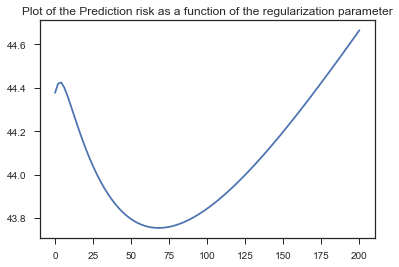

In [41]:
plt.plot(X,Y)
plt.title("Plot of the Prediction risk as a function of the regularization parameter")

In [42]:
print("The minimal prediction risk is obtained with the parameter : alpha = "
      +str(np.argmin(Y)))

The minimal prediction risk is obtained with the parameter : alpha = 34


# Question 13

In [43]:
model = LassoCV().fit(
    train[[i for i in range(210)]],
    train[210])

In [44]:
print("The prediction risk associated to the LASSO model is : "
      +str(prediction_risk(list(model.predict(train[[i for i in range(210)]])),list(train[210]))))

The prediction risk associated to the LASSO model is : 8.715883393654952


# Question 14

In [45]:
selected = []
for k in range(len(model.coef_)):
    if np.abs(model.coef_[k])>0:
        selected.append(k)

print("We have : "+str(len(selected))
      +str(" variables selected by the LASSO : "))

print(str(selected))

We have : 11 variables selected by the LASSO : 
[13, 31, 58, 84, 112, 113, 117, 123, 129, 167, 174]


In [46]:
model = LinearRegression().fit(
    train[selected],
    train[210])

prediction = model.predict(test[selected])
print("The Least-square LASSO applied to the inital test set yields a prediction risk of : "
      + str(prediction_risk(list(prediction),list(test[210]))))

print("This is lower than the risks for both regular OLS and PCA OLS.")

The Least-square LASSO applied to the inital test set yields a prediction risk of : 34.14335155369121
This is lower than the risks for both regular OLS and PCA OLS.


# Question 15

For this question we will use SVR : Support Vector Regression, where there are two free parameters : epsilon and C.
We will use the variables determined in question 13 via LASSO regression

In [47]:
#We create yet another training set:
train_SVR = train[selected] 
#selected corresponds to the variables selected in question 13
test_SVR = test[selected]

In [48]:
def modelize_SVR(C,epsilon):
    model = SVR(C=C,epsilon=epsilon).fit(train_SVR,train[210])
    prediction = model.predict(test_SVR)
    return prediction_risk(list(prediction),list(test[210]))

<IPython.core.display.Javascript object>


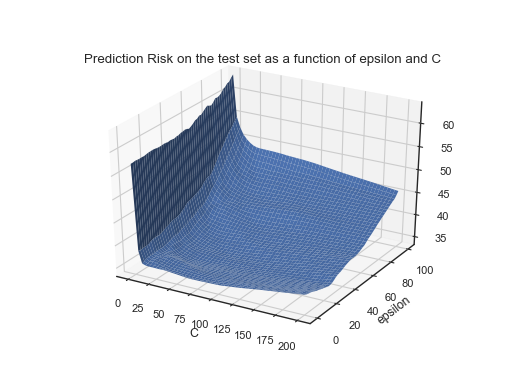

The minimal prediction risk is obtained for the parameters (C,epsilon) = (57.214285714285715,28.571428571428573)
This minimal risk is : 33.81458529772674


In [51]:
%matplotlib notebook 
#Uncomment the previous line for an interactive 3D graph only for this question (it's better).
from mpl_toolkits.mplot3d import Axes3D
#Beware, %matplotlib notebook will render the previous graphs unreadable!!!! 


xx , yy = np.meshgrid(np.linspace(0.1,200,50),np.linspace(0,100,50)) #meshgrid(C,epsilon)
zz = np.zeros((50,50))

zz_min = np.inf
C_min = 0
e_min = 0

for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        zz[i, j] = modelize_SVR(xx[i,j],yy[i,j])
        if zz[i, j] <= zz_min :
            zz_min = zz[i, j]
            C_min = xx[i, j]
            e_min = yy[i, j]        
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,zz)
plt.xlabel('C')
plt.ylabel('epsilon')
plt.title('Prediction Risk on the test set as a function of epsilon and C')
print('The minimal prediction risk is obtained for the parameters (C,epsilon) = (' + str(C_min)+','+str(e_min)+')')
print('This minimal risk is : '+str(zz_min))